# House Sales in King County, USA
----

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

**id** :a notation for a house

**date**: Date house was sold

**price**: Price is prediction target

**bedrooms**: Number of Bedrooms/House

**bathrooms**: Number of bathrooms/bedrooms

**sqft_living**: square footage of the home

**sqft_lot**: square footage of the lot

**floors** :Total floors (levels) in house

**waterfront** :House which has a view to a waterfront

**view**: Has been viewed

**condition** :How good the condition is Overall

**grade**: overall grade given to the housing unit, based on King County grading system

**sqft_above** :square footage of house apart from basement

**sqft_basement**: square footage of the basement

**yr_built** :Built Year

**yr_renovated** :Year when house was renovated

**zipcode**:zip code

**lat**: Latitude coordinate

**long**: Longitude coordinate

**sqft_living15** :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

**sqft_lot15** :lotSize area in 2015(implies-- some renovations)

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import gmaps
import os

# Importing Data

- Load and read csv file

In [2]:
# File to Load:
file_to_load='kc_house_data.csv' 

# Read kc_house_data csv file and store into data frame:
kc_house_data_df=pd.read_csv(file_to_load)
kc_house_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Slicing Data
- Only display in dataframe columns: 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'yr_built', 'zipcode', 'lat', 'long'

In [3]:
# Columns to display
house_data_df = kc_house_data_df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 
                                  'waterfront', 'yr_built', 'zipcode', 'lat', 'long']]

# Formatting
#house_data_df.style.format({"price": "${:,.2f}", "bathrooms":"{:.2f}"})

house_data_df.head()



,id,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,zipcode,lat,long
0,7129300520,221900.0,3,1.00,1180,0,1955,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,0,1951,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,0,1933,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,0,1965,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,0,1987,98074,47.6168,-122.045


# Statiscal Summary
- Obtain statiscal summary of dataframe

In [4]:
house_data_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,0.007542,1971.005136,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,0.086517,29.373411,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,0.000000,1951.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,0.000000,1975.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,0.000000,1997.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.000000,2015.000000,98199.000000,47.777600,-121.315000


In [38]:
house_data_df.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
waterfront       int64
yr_built         int64
zipcode          int64
lat            float64
long           float64
dtype: object

# 1. What’s the average amount of bedrooms and bathrooms in a house and is the price higher when the house has more bedrooms or bathrooms?

In [39]:
# Calculate average amount of bedrooms
avg_bedroom = house_data_df['bedrooms'].mean()
print(f" The average amount of bedrooms in a house is {round(avg_bedroom,0)}")


# Calculate average amount of bathrooms
avg_bathroom = house_data_df['bathrooms'].mean()
print(f" The average amount of bathrooms in a house is {round(avg_bathroom,2)}")

 The average amount of bedrooms in a house is 3.0
 The average amount of bathrooms in a house is 2.11


Scatter plots with linear regression and r-squared value (bedrooms vs. price and bathrooms vs. price) 

C:\Users\ameli\AppData\Local\Temp/ipykernel_30088/1794443081.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


The r-squared is: 0.30833836868809633


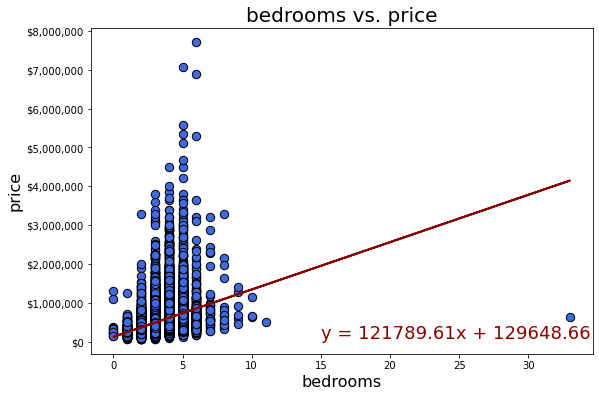

In [40]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = house_data_df['bedrooms']
y_values = house_data_df['price']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('bedrooms vs. price', fontsize=20)
plt.ylabel('price', fontsize=16, color='black')
plt.xlabel('bedrooms', fontsize=16, color='black')
plt.annotate(line_eq,(15,8.000000e+04), fontsize=18, color='darkred')
plt.ticklabel_format(style='plain')
#plt.grid(False)
    
# Format the labels on y-axis with dollar sign
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
# plt.savefig('output_data/Bedrooms vs. Price.png')

# Show plot:
plt.show()

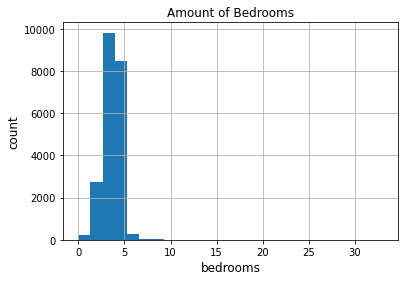

In [41]:
# Amount of Bedrooms Histogram
house_data_df["bedrooms"].hist(bins=25)
plt.ylabel('count', fontsize=12, color='black')
plt.xlabel('bedrooms', fontsize=12, color='black')
plt.title("Amount of Bedrooms")

# Save the figure:
plt.savefig('output_data/Amount of Bedrooms Histogram.png')

plt.show()

In [42]:
# house_data_df with only price and bedrooms columns
house_data_df[["price", "bedrooms"]]

# Find the average price by amount of bedrooms
bedroom_mean = house_data_df.groupby('bedrooms').mean()["price"]
#bedroom_mean

# Change series to dataframe
bedroom_df = bedroom_mean.to_frame(name='price')

# Formatting
#bedroom_df.style.format({"price": "${:,.2f}"})

bedroom_df

,price
bedrooms,
0,4.102231e+05
1,3.176580e+05
2,4.013877e+05
3,4.662766e+05
4,6.355647e+05
5,7.868741e+05
6,8.258535e+05
7,9.514478e+05
8,1.105077e+06


C:\Users\ameli\AppData\Local\Temp/ipykernel_30088/3052473027.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


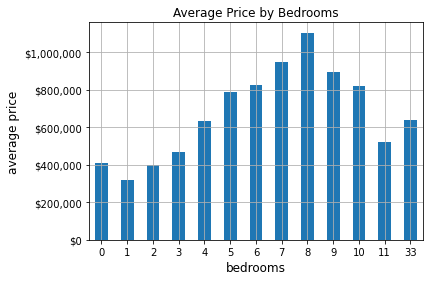

In [43]:
# Average Price by Bedrooms Bar Graph
bedroom_df.plot.bar(rot=360)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
#plt.xlim([-0.5, 10.5])
plt.ylabel('average price', fontsize=12, color='black')
plt.xlabel('bedrooms', fontsize=12, color='black')
plt.title("Average Price by Bedrooms")
plt.grid()

# Format the labels on y-axis to currency
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

# Remove legend
plt.gca().get_legend().remove()

# Save the figure:
plt.savefig('output_data/Average Price by Bedrooms Bar Graph.png')

plt.show()

C:\Users\ameli\AppData\Local\Temp/ipykernel_30088/4189254664.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


The r-squared is: 0.5251340727456008


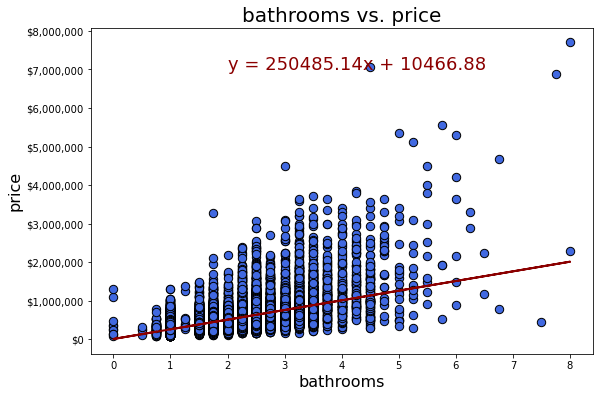

In [44]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = house_data_df['bathrooms']
y_values = house_data_df['price']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('bathrooms vs. price', fontsize=20)
plt.ylabel('price', fontsize=16, color='black')
plt.xlabel('bathrooms', fontsize=16, color='black')
plt.annotate(line_eq,(2,7.000000e+06), fontsize=18, color='darkred')
#plt.grid(False)

# Format the labels on y-axis with dollar sign
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
# plt.savefig('output_data/Bathrooms vs. Price.png')

# Show plot:
plt.show()

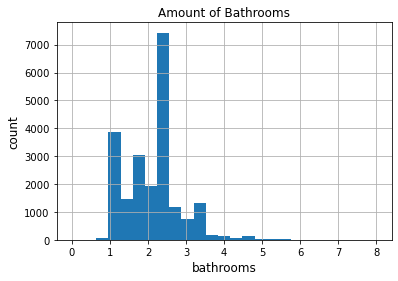

In [45]:
# Amount of Bathrooms Histogram
house_data_df["bathrooms"].hist(bins=25)
plt.ylabel('count', fontsize=12, color='black')
plt.xlabel('bathrooms', fontsize=12, color='black')
plt.title("Amount of Bathrooms")

# Save the figure:
plt.savefig('output_data/Amount of Bathrooms Histogram.png')

plt.show()


In [46]:
# house_data_df with only price and bathrooms columns
house_data_df[["price", "bathrooms"]]

# Find the average price by amount of bathrooms
bathroom_mean = house_data_df.groupby('bathrooms').mean()["price"]
#bathroom_mean

# Change series to dataframe
bathroom_df = bathroom_mean.to_frame(name='price')

# Formatting
#bathroom_df.style.format({"price": "${:,.2f}"})

bathroom_df

,price
bathrooms,
0.00,4.490950e+05
0.50,2.373750e+05
0.75,2.945209e+05
1.00,3.470412e+05
1.25,6.217722e+05
1.50,4.093457e+05
1.75,4.549158e+05
2.00,4.579050e+05
2.25,5.337688e+05


C:\Users\ameli\AppData\Local\Temp/ipykernel_30088/2554182026.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


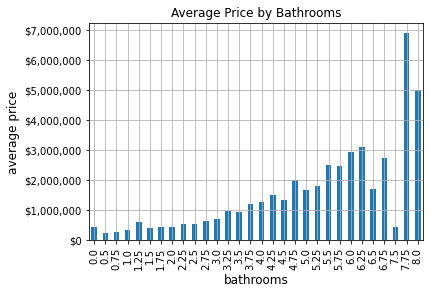

In [47]:
# Average Price by Bathrooms Bar Graph
bathroom_df.plot.bar(rot=90)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.ylabel('average price', fontsize=12, color='black')
plt.xlabel('bathrooms', fontsize=12, color='black')
plt.title("Average Price by Bathrooms")
plt.grid()

# Format the labels on y-axis to currency
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

# Remove legend
plt.gca().get_legend().remove()

# Save the figure:
plt.savefig('output_data/Average Price by Bathrooms Bar Graph.png')

plt.show()

# 2. What’s the correlation between sqft_living and pricing and do larger sqft_living greater than 6,000 sqft with a waterfront view cost more or less than those without a waterfront view?

Scatter plot with linear regression and r-squared value (sqft_living vs. price)

The r-squared is: 0.702043721232527


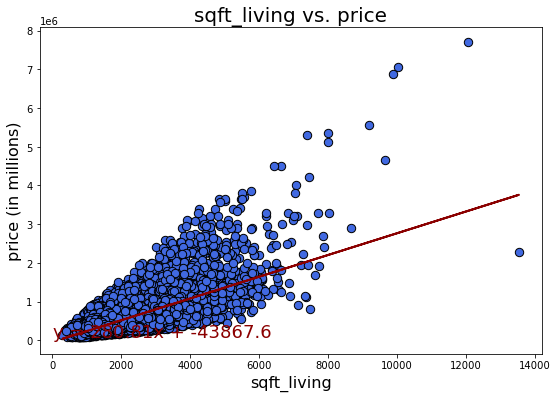

In [48]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = house_data_df['sqft_living']
y_values = house_data_df['price']

# Perform a linear regression on sqft_living vs. price:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('sqft_living vs. price', fontsize=20)
plt.ylabel('price (in millions)', fontsize=16, color='black')
plt.xlabel('sqft_living', fontsize=16, color='black')
plt.annotate(line_eq,(15,8.000000e+04), fontsize=18, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
plt.savefig('output_data/Square Footage vs. Price.png')

# Show plot:
plt.show()

Dataframe for larger sqft_living greater than 6,000 sqft with waterfront view and without waterfront view price columns

In [49]:
# Return homes over 6,000 squarefeet with a waterfront view
sixk_sqft_with_waterfront_df = house_data_df[(house_data_df.sqft_living > 6000) & (house_data_df.waterfront == 1)]
sixk_sqft_with_waterfront_df.head()

,id,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,zipcode,lat,long
1164,1247600105,5110000.0,5,5.25,8010,1,1999,98033,47.6767,-122.211
1315,7558700030,5300000.0,6,6.00,7390,1,1991,98040,47.5631,-122.210
2444,7524900003,3280000.0,2,1.75,6840,1,2001,98008,47.6042,-122.112
2626,7738500731,4500000.0,5,5.50,6640,1,2004,98155,47.7493,-122.280
3914,9808700762,7060000.0,5,4.50,10040,1,1940,98004,47.6500,-122.214


Scatter plots with linear regression and r-squared value (larger sqft_living greater than 6,000 sqft with waterfront view and without waterfront view vs. price)

In [50]:
# Return homes over 6,000 squarefeet without a waterfront view
sixk_sqft_without_waterfront_df = house_data_df[(house_data_df.sqft_living > 6000) & (house_data_df.waterfront == 0)]
sixk_sqft_without_waterfront_df.head()

,id,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,zipcode,lat,long
419,8678500060,1550000.0,5,4.25,6070,0,1999,98024,47.5954,-121.950
527,3225079035,1600000.0,6,5.00,6050,0,2001,98024,47.6033,-121.943
577,1526069135,930000.0,4,4.00,6050,0,2009,98077,47.7466,-122.029
1100,7237500390,1570000.0,5,4.50,6070,0,2004,98059,47.5306,-122.134
1448,8907500070,5350000.0,5,5.00,8000,0,2009,98004,47.6232,-122.220


In [51]:
# Return average price of homes over 6,000 squarefeet with a waterfront
sixk_sqft_with_waterfront_df["price"].mean()

4552500.0

In [52]:
# Return average price of homes over 6,000 squarefeet without a waterfront
sixk_sqft_without_waterfront_df["price"].mean()

2425000.0

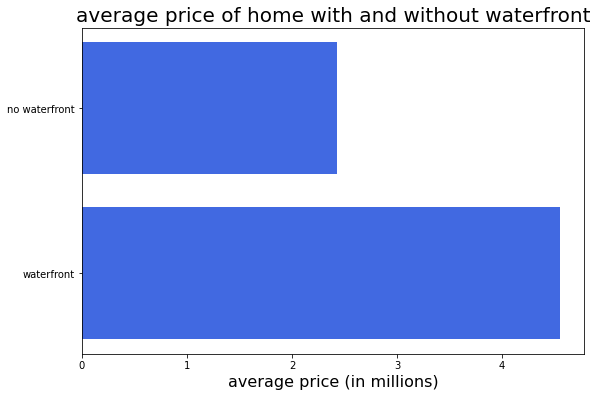

In [53]:
# Build bar plot for homes larger than 6,000 sqft vs. price with waterfront

# List variables
yvariablelist = [sixk_sqft_with_waterfront_df["price"].mean()/1000000, sixk_sqft_without_waterfront_df["price"].mean()/1000000]
xvariablelist = ["waterfront","no waterfront"]

# Set figure size
plt.figure(figsize=(9,6))
plt.barh(xvariablelist, yvariablelist, color="royalblue")

# Set title and labels
plt.title("average price of home with and without waterfront", fontsize=20, color='black')
plt.xlabel("average price (in millions)", fontsize=16, color='black')

# Save the figure:
plt.savefig('output_data/Average Prices of Homes Greater than 6,000 sqft with and without Waterfronts.png')

# Display graph
plt.show()

# 3. Are house sale prices higher in higher income neighborhoods?

Scatter plot with linear regression and r-squared value (zipcode vs. price) 

In [54]:
#load file
income_csv='income_by_zipcode.csv'

#store into dataframe
high_income_df = pd.read_csv(income_csv)

house_data_with_income = pd.merge(house_data_df, high_income_df, how='right', on = 'zipcode')
house_data_with_income    

,id,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,zipcode,lat,long,Rank,Zip Code (state),Median Household Income (USD)
0,3.303700e+09,667000.0,3.0,1.00,1400.0,0.0,1909.0,98112,47.6221,-122.314,1,"98112, WA","115,265"
1,8.722101e+09,780000.0,3.0,1.00,1660.0,0.0,1911.0,98112,47.6362,-122.302,1,"98112, WA","115,265"
2,5.016002e+09,725000.0,3.0,1.75,1920.0,0.0,1913.0,98112,47.6239,-122.298,1,"98112, WA","115,265"
3,9.828703e+09,490000.0,2.0,2.50,1230.0,0.0,2004.0,98112,47.6192,-122.301,1,"98112, WA","115,265"
4,4.386700e+09,2250000.0,4.0,2.25,4760.0,0.0,1916.0,98112,47.6415,-122.285,1,"98112, WA","115,265"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8963,9.325200e+09,600600.0,4.0,3.50,3110.0,0.0,2014.0,98148,47.4349,-122.328,31,"98148, WA","56,044"
8964,2.023049e+09,246500.0,2.0,1.00,940.0,0.0,1954.0,98148,47.4631,-122.329,31,"98148, WA","56,044"
8965,7.250000e+09,338000.0,3.0,2.00,2440.0,0.0,1933.0,98148,47.4594,-122.326,31,"98148, WA","56,044"
8966,5.220491e+08,459000.0,4.0,3.00,2530.0,0.0,2013.0,98148,47.4310,-122.335,31,"98148, WA","56,044"


TypeError: can only concatenate str (not "float") to str

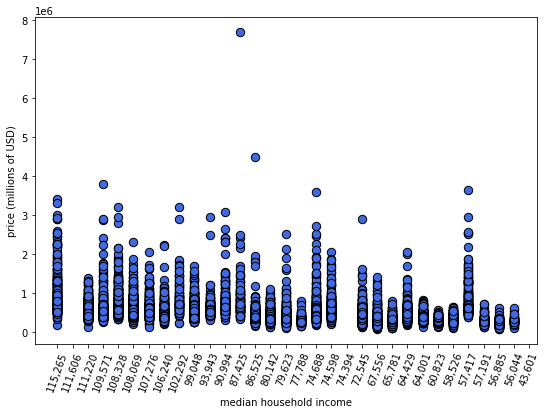

In [55]:
plt.figure(figsize=(9,6))
y_values = house_data_with_income['price']
x_values = house_data_with_income['Median Household Income (USD)']
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')

plt.xticks(rotation=70)
plt.xlabel('median household income')
plt.ylabel('price (millions of USD)')

x = x_values
y = y_values
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)

plt.show()

Dataframe for 10 most expensive houses by neighborhood zipcode include lat, lng, House ID, Price, and zipcode columns

In [5]:
top_prices = house_data_df.sort_values(by=['price'], ascending=False).copy()
top_ten_df = top_prices.head(10)
top_ten_df

,id,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,zipcode,lat,long
7252,6762700020,7700000.0,6,8.00,12050,0,1910,98102,47.6298,-122.323
3914,9808700762,7060000.0,5,4.50,10040,1,1940,98004,47.6500,-122.214
9254,9208900037,6890000.0,6,7.75,9890,0,2001,98039,47.6305,-122.240
4411,2470100110,5570000.0,5,5.75,9200,0,2001,98039,47.6289,-122.233
1448,8907500070,5350000.0,5,5.00,8000,0,2009,98004,47.6232,-122.220
1315,7558700030,5300000.0,6,6.00,7390,1,1991,98040,47.5631,-122.210
1164,1247600105,5110000.0,5,5.25,8010,1,1999,98033,47.6767,-122.211
8092,1924059029,4670000.0,5,6.75,9640,1,1983,98040,47.5570,-122.210
2626,7738500731,4500000.0,5,5.50,6640,1,2004,98155,47.7493,-122.280
8638,3835500195,4490000.0,4,3.00,6430,0,2001,98004,47.6208,-122.219


Plot markers for top 10 most expensive houses by neighborhood zipcode or lat and lng on a map with pins containing House ID, Price, and zipcode

In [15]:
# import API key
from config import gkey

# configure gmaps
gmaps.configure(api_key=gkey)

# using the template add the markers to the map
info_box_template = """
<dl>
<dt>House ID</dt><dd>{id}</dd>
<dt>Price</dt><dd>{price}</dd>
<dt>Zipcode</dt><dd>{zipcode}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
top_ten_info = [info_box_template.format(**row) for index, row in top_ten_df.iterrows()]


locations = top_ten_df[['lat', 'long']]

figure_layout = {
     'width': '400px',
     'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
     'margin': '0 auto 0 auto'
 }

# add marker layer ontop of heat map
fig = gmaps.figure(layout=figure_layout)

# assign the marker layer to locations
markers = gmaps.marker_layer(locations,info_box_content=top_ten_info)

# add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

# 4. Do houses with a waterfront view or without a waterfront view have more price outliers?

Waterfront vs. Non_waterfront house prices analysis using pie and bar chart 

In [ ]:
# Non_waterfront only
non_wf=house_data_df.loc[house_data_df["waterfront"]==0]
non_wf.count()["id"]

In [ ]:
# waterfront properties only
wf=house_data_df.loc[house_data_df["waterfront"]==1]
wf.count()["id"]

Pie chart to show waterfront vs non-waterfront properties

In [ ]:
labels = ["Waterfront", "Non-waterfront"]

# The values of each section of the pie chart - from waterfront and non waterfront properties count
sizes = [163, 21450]

# The colors of each section of the pie chart
colors = ["red", "lightblue"]

explode = (0.5, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.savefig('output_data/ waterfront vs nonwaterfront piechart.png')
plt.show()

In [ ]:
bins = [0,1000,2000,3000,4000,5000,6000,7000]
group_label=["<1000", "1000-2000", "2000-3000", "3000-4000","4000-5000","5000-6000",">6000"]
pd.cut(wf["sqft_living"], bins, labels=group_label).head()

In [ ]:
wf["living_sqft_range"]=pd.cut(wf["sqft_living"], bins, labels=group_label)
wfrange=wf.groupby(["living_sqft_range"])
wfrange_df=wfrange['price','bedrooms','bathrooms'].median()
print(wfrange_df)

In [ ]:
bins = [0,1000,2000,3000,4000,5000,6000,7000]
group_label=["<1000", "1000-2000", "2000-3000", "3000-4000","4000-5000","5000-6000",">6000"]
pd.cut(non_wf["sqft_living"], bins, labels=group_label).head()

In [ ]:
non_wf["living_sqft_range"]=pd.cut(non_wf["sqft_living"], bins, labels=group_label)
non_wfrange=non_wf.groupby(["living_sqft_range"])
non_wfrange_df=non_wfrange['price','bedrooms','bathrooms'].median()
print(non_wfrange_df)

In [ ]:
wf_vs_non=pd.merge(wfrange_df,non_wfrange_df, how="left", on = ["living_sqft_range"])

wfnon_df = wf_vs_non.rename(columns={"price_x":"price_wf",
                                    "bedrooms_x":"bedrooms_wf",
                                    "bathrooms_x":"bathrooms_wf",
                                    "price_y":"price_nonwf",
                                    "bedrooms_y":"bedrooms_nonwf",
                                    "bathrooms_y": "bathrooms_nonwf"})

wfnon_df

In [ ]:
wfnon_df=wfnon_df.reset_index(level=0)

In [ ]:
wfnon_df

In [ ]:
pandas_bar=wfnon_df
pandas_bar.plot(kind="bar",x="living_sqft_range", y=["price_wf","price_nonwf"],rot=45)

plt.xlabel("Living Sqft Range")
plt.ylabel("Prices (Millions)")
plt.title("Waterfront vs. Non-Waterfront")
plt.savefig('output_data/ waterfront vs nonwf price barchart.png')
plt.show()

Scatter plot with linear regression and r-squared value (waterfront bedrooms vs. price) 

In [ ]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = wf['bedrooms']
y_values = wf['price']

x = non_wf["bedrooms"]
y = non_wf["price"]

# Perform a linear regression 
# waterfront
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# non-waterfront
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x, y)
# Get regression values:
regress_values = x_values * slope + intercept
regress_values1 = x * slope1 + intercept1

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


# Create plot:
# waterfront
plt.scatter(x_values,y_values, marker='o', color='red', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'red', linewidth=2)
# non-waterfront
plt.scatter(x,y, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x,regress_values1,'royalblue', linewidth=2)

# Incorporate the other graph properties:
plt.title('Bedrooms vs. Prices', fontsize=20)
plt.ylabel('price (in millions)', fontsize=16, color='black')
plt.ylim([0,5000000])
plt.xlim([0,10])
plt.xlabel('bedrooms', fontsize=16, color='black')
plt.annotate(line_eq,(3,4000000), fontsize=18, color='red')
#plt.grid(False)


# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
plt.savefig('output_data/Waterfront Bedrooms vs. Prices.png')

# Show plot:
plt.show()

Boxplot (waterfront & price)

In [ ]:
def color_boxplot(data, color, pos=[0], ax=None):
    ax = ax or plt.gca()
    bp = ax.boxplot(data, patch_artist=True,  showmeans=True, positions=pos)
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color=color)
        
view_df=wf[["price"]]
nonview_df=non_wf[["price"]]

data1 = view_df
data2 = nonview_df
fig, ax = plt.subplots()
bp1 = color_boxplot(data1, 'red', [1])
bp2 = color_boxplot(data2, 'royalblue', [2])
ax.autoscale()
ax.set(xticks=[1,2], xticklabels=["waterfront","non-waterfront"])
plt.ylabel("Price (in Millions)")
plt.ylim([0,5000000])
plt.savefig('output_data/ Waterfront(Non-waterfront) vs. Price boxplot.png')
plt.show()

# 5. Do newly built homes cost more than older built homes and where/ which zipcodes are the majority of the newly built homes located at?

### Scatter plot with linear regression and r-squared value (year built vs. price) 

In [ ]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = house_data_df['yr_built']
y_values = house_data_df['price']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Year Built vs. Price', fontsize=20)
plt.ylabel('Price (in millions)', fontsize=16, color='black')
plt.xlabel('Year Built', fontsize=16, color='black')
plt.annotate(line_eq,(1900,5e6), fontsize=18, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
plt.savefig('output_data/yearbuiltvsprice.png')

# Show plot:
plt.show()

For the graph above, it appears that there is not a strong correlation between year built and price. Folks buying homes seem to desire older homes in a similar distribution to newer ones and are willing to pay similar prices.

### Scatter plot with linear regression and r-squared value (year renovated vs. price) 

In [ ]:
#new Data Frame with year renovated column instead of year built
renovated_df = kc_house_data_df[["id", "lat", "long","zipcode", "price", "yr_renovated"]]
renovated_df = renovated_df[renovated_df["yr_renovated"] > 0]

# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = renovated_df['yr_renovated']
y_values = renovated_df['price']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Year Renovated vs. Price', fontsize=20)
plt.ylabel('Price (in millions)', fontsize=16, color='black')
plt.xlabel('Year Renovated', fontsize=16, color='black')
plt.annotate(line_eq,(1935,5e6), fontsize=18, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
plt.savefig('output_data/yearrenovatedvsprice.png')

# Show plot:
plt.show()

In the graph above we see that there is a stronger correlation between price and year renovated. It seems that folks buying homes do tend to pay more for homes that are renovated, regardless of the year originally built.

### Dataframe for top 6 most newly built houses include lat, lng, House ID, Price, and yr_built columns

In [ ]:
#sort by most recent year built
top_six_new_df = house_data_df.sort_values("yr_built", ascending=False)

#narrow data frame
top_six_new_df = top_six_new_df[["id", "lat", "long", "zipcode", "price", "yr_built"]]

#show top 6 results
top_six_new_df = top_six_new_df.head(6)
top_six_new_df

### Dataframe for top 6 recently renovated houses include lat, lng, House ID, Price, and yr_renovated columns

In [ ]:
#sort by most recent year
top_six_renovated = renovated_df.sort_values("yr_renovated", ascending=False)

#show top 6 results
top_six_renovated = top_six_renovated.head(6)
top_six_renovated

In [ ]:
#number of homes
len(house_data_df["id"])
#number of renovated homes
len(renovated_df["id"])

#percentage of renovated homes
percent_renovated = round((len(renovated_df["id"]) / len(house_data_df["id"]))*100, 2)
percent_renovated

### Plot markers for the top 6 most newly built houses using lat and lng on a map with pins containing House ID, Price, and yr_built

In [ ]:
# import API key
from api_keys import g_key

# configure gmaps
gmaps.configure(api_key=g_key)

# using the template add the markers to the map
info_box_template = """
<dl>
<dt>House ID</dt><dd>{id}</dd>
<dt>Price</dt><dd>{price}</dd>
<dt>Year Built</dt><dd>{yr_built}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
top_six_info = [info_box_template.format(**row) for index, row in top_six_new_df.iterrows()]
locations = top_six_new_df[["lat", "long"]]

figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

# add marker layer ontop of heat map
fig = gmaps.figure(layout=figure_layout)

# assign the marker layer to locations
markers = gmaps.marker_layer(locations,info_box_content=top_six_info)

# add the layer to the map
fig.add_layer(markers)
fig

### Group data frame by zip code, show the zipcodes with the newest houses along with average price, and number of houses per zip code

In [ ]:
#narrow data frame
zipcode_df = house_data_df[["id", "zipcode", "price", "yr_built"]]

#group by zipcode
zipcode_df = zipcode_df.groupby(["zipcode"])

# define variables to display most recent year, average price, number of houses for each zip
newest = zipcode_df["yr_built"].max()
price_mean = zipcode_df["price"].mean()
house_count = zipcode_df["id"].count()
zipcode_gb_df= pd.DataFrame({"id": house_count, "yr_built": newest, "price": price_mean})

# sort by year built
zipcode_gb_df = zipcode_gb_df.sort_values("yr_built", ascending=False)
zipcode_gb_df.head()

## Accessibility analysis: What can we conclude from this data set and where are there gaps?

In [ ]:
#narrow data frame
floors_df = kc_house_data_df[['id', 'price', 'floors', 'yr_built', 'zipcode', 'lat', 'long']]
floors_df.head()

In [ ]:
#data frame for one floor homes
floors_one_df = floors_df[floors_df["floors"] == 1]
floors_one_df.head()

In [ ]:
#number of total homes
len(floors_df["id"])
#number of homes with one floor
len(floors_one_df["id"])

#percentage of homes with one floor from data set
percent_one_floor = round((len(floors_one_df["id"]) / len(floors_df["id"]))*100, 2)

print(f'{percent_one_floor}% of homes in this data set have only one floor')

Conclusion: A gap in this data set is the lack of visibility on accessible housing for folks with disabilities. The only column in this data set that may indicate some level of accessible residences are the number of ranch/one level homes. This cateogry is helpful, but does not confirm other standards such as wide doorways, number of standing showers instead of bathtubs, lower countertops etc. Though the 2010 ADA Standards for Accessible Design are required for most new public buildings, the rule does not apply to most residential buildings, so we cannot say for sure that homes built after a certain year are more accessible than older homes. A potential improvement for this data set would be to assign each house id with an accessibility rating similar to condition or grade.